In [2]:
# !pip install tensorflow==2.0.0-beta1

import tensorflow as tf
print(tf.__version__)

2.0.0-beta1


In [0]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.layers import Dense, Input, GlobalMaxPooling1D
from tensorflow.keras.layers import LSTM, Embedding
from tensorflow.keras.models import Model

In [10]:
!wget -nc https://lazyprogrammer.me/course_files/spam.csv

File ‘spam.csv’ already there; not retrieving.



In [11]:
df = pd.read_csv('spam.csv', encoding='ISO-8859-1')
df.head()

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN


In [0]:
# drop unnecessary columns
df = df.drop(["Unnamed: 2", "Unnamed: 3", "Unnamed: 4"], axis=1)

In [0]:
df.columns = ['labels', 'data']

In [0]:
# create binary labels
df['b_labels'] = df['labels'].map({'ham': 0, 'spam': 1})
Y = df['b_labels'].values

In [0]:
# split up the data
df_train, df_test, Ytrain, Ytest = train_test_split(df['data'], Y, test_size=0.33)

In [0]:
# Convert sentences to sequences
MAX_VOCAB_SIZE = 20000
tokenizer = Tokenizer(num_words=MAX_VOCAB_SIZE)
tokenizer.fit_on_texts(df_train)
sequences_train = tokenizer.texts_to_sequences(df_train)
sequences_test = tokenizer.texts_to_sequences(df_test)

In [18]:
# get word -> integer mapping
word2idx = tokenizer.word_index
V = len(word2idx)
print('Found %s unique tokens.' % V)

Found 7285 unique tokens.


In [19]:
# pad sequences so that we get a N x T matrix
data_train = pad_sequences(sequences_train)
print('Shape of data train tensor:', data_train.shape)

# get sequence length  -  Maximum length of sentence after padding
T = data_train.shape[1]

Shape of data train tensor: (3733, 121)


In [20]:
data_test = pad_sequences(sequences_test, maxlen=T)
print('Shape of data test tensor:', data_test.shape)

Shape of data test tensor: (1839, 121)


In [0]:
# Create the model

# Hyperparameter
  # Embedding dimensionality
D = 20
  # Hidden state dimensionality
M = 15

# Size of the embedding: (V + 1) x T X D
  # V + 1: Includes padding index "0"
i = Input(shape=(T,))
x = Embedding(V + 1, D)(i)
x = LSTM(M, return_sequences=True)(x)
x = GlobalMaxPooling1D()(x)
x = Dense(1, activation='sigmoid')(x)

model = Model(i, x)


In [22]:
# Compile and fit
model.compile(
  loss='binary_crossentropy',
  optimizer='adam',
  metrics=['accuracy']
)


print('Training model...')
r = model.fit(
  data_train,
  Ytrain,
  epochs=10,
  validation_data=(data_test, Ytest)
)

Training model...
Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where
Train on 3733 samples, validate on 1839 samples
Epoch 1/10
3733/3733 [==============================] - 8s 2ms/sample - loss: 0.4846 - accuracy: 0.8561 - val_loss: 0.3906 - val_accuracy: 0.8684
Epoch 2/10
3733/3733 [==============================] - 7s 2ms/sample - loss: 0.3895 - accuracy: 0.8647 - val_loss: 0.3890 - val_accuracy: 0.8684
Epoch 3/10
3733/3733 [==============================] - 7s 2ms/sample - loss: 0.3572 - accuracy: 0.8647 - val_loss: 0.3117 - val_accuracy: 0.8684
Epoch 4/10
3733/3733 [==============================] - 7s 2ms/sample - loss: 0.2817 - accuracy: 0.8647 - val_loss: 0.2525 - val_accuracy: 0.8684
Epoch 5/10
3733/3733 [==============================] - 7s 2ms/sample - loss: 0.2157 - accuracy: 0.8647 - val_loss: 0.1876 - val_accuracy: 0.8684
Epoch 6/10
3733/3733 [==============================] - 7s 2ms/sample - loss: 0.1465 - accuracy: 0.9665 - val_

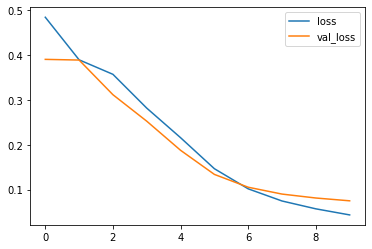

In [23]:
# Plot loss per iteration
import matplotlib.pyplot as plt
plt.plot(r.history['loss'], label='loss')
plt.plot(r.history['val_loss'], label='val_loss')
plt.legend()

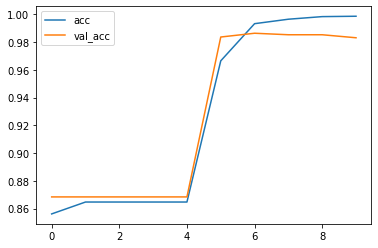

In [24]:
# Plot accuracy per iteration
plt.plot(r.history['accuracy'], label='acc')
plt.plot(r.history['val_accuracy'], label='val_acc')
plt.legend()